# Plot Example Sample

This notebook contains code to plot example samples. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from dotenv import load_dotenv

from utils.data import NormalizedDataset
from utils.component_analysis import SamplePCA

In [2]:
def load_dataset_paths():
    """ Get dataset paths from .env file """
    load_dotenv()
    dataset_paths = []

    # Loop through environment variables and collect dataset paths
    for key, value in os.environ.items():
        if key.startswith("DATASET_PATH_"):  # Look for keys starting with "DATASET_PATH_"
            dataset_paths.append(Path(value.strip("'")))

    return dataset_paths

# Get dataset paths from .env file
dataset_paths = load_dataset_paths()

# Alternatively, manually write the correct paths in the following line: 
# dataset_paths = [Path('C:/.../toy1/'), Path('C:/.../toy2/')]

# Create dataset to get both raw and normalized images
dataset = NormalizedDataset(dataset_paths)

62
T00_Sample2


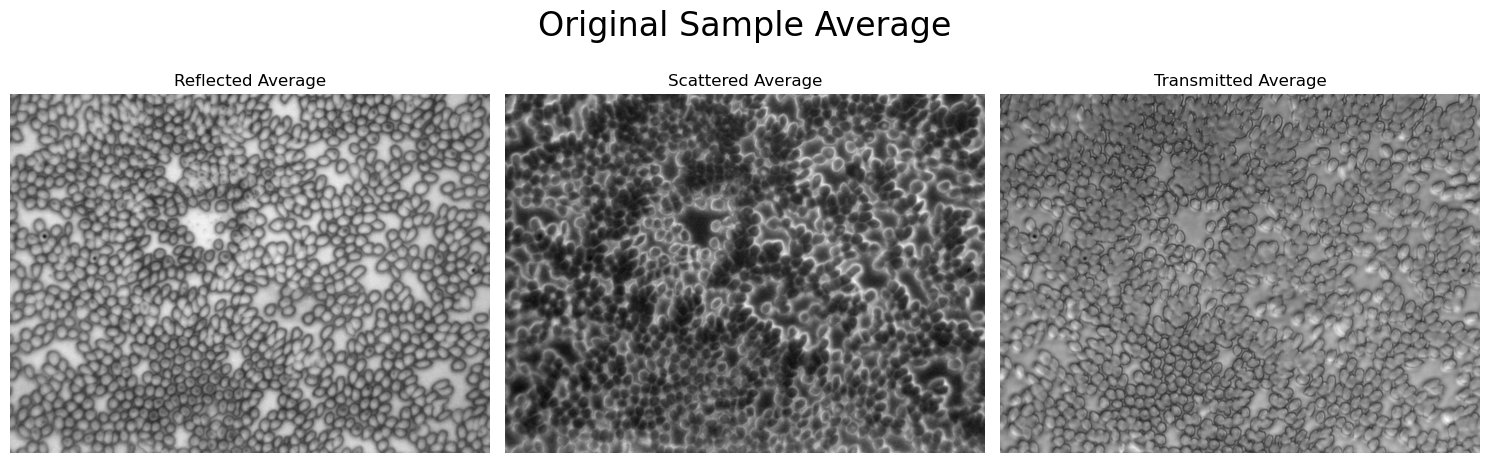

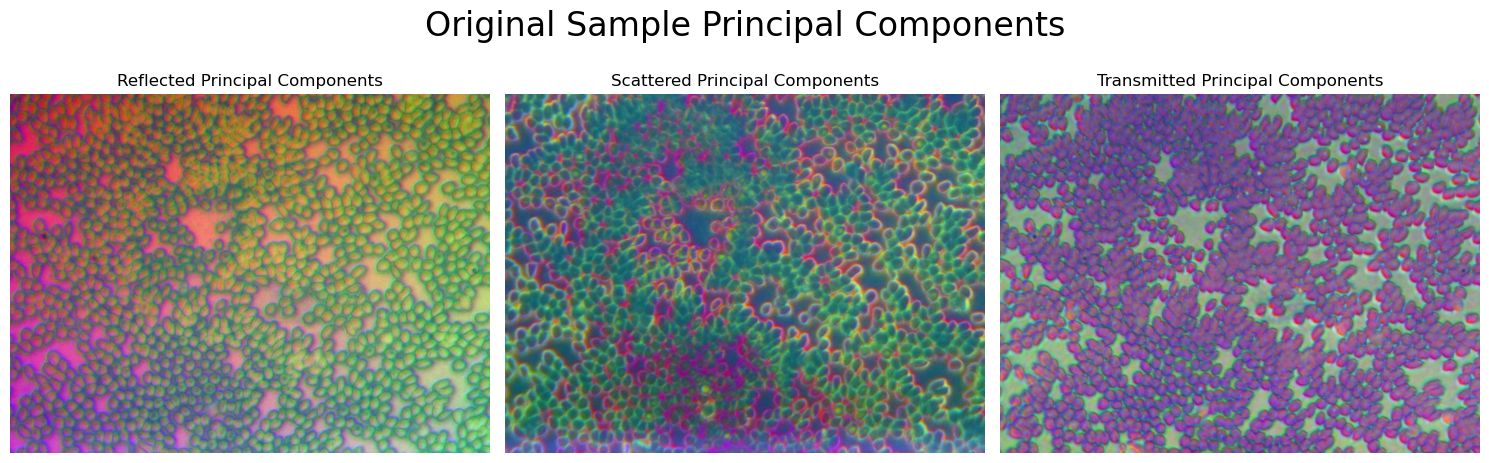

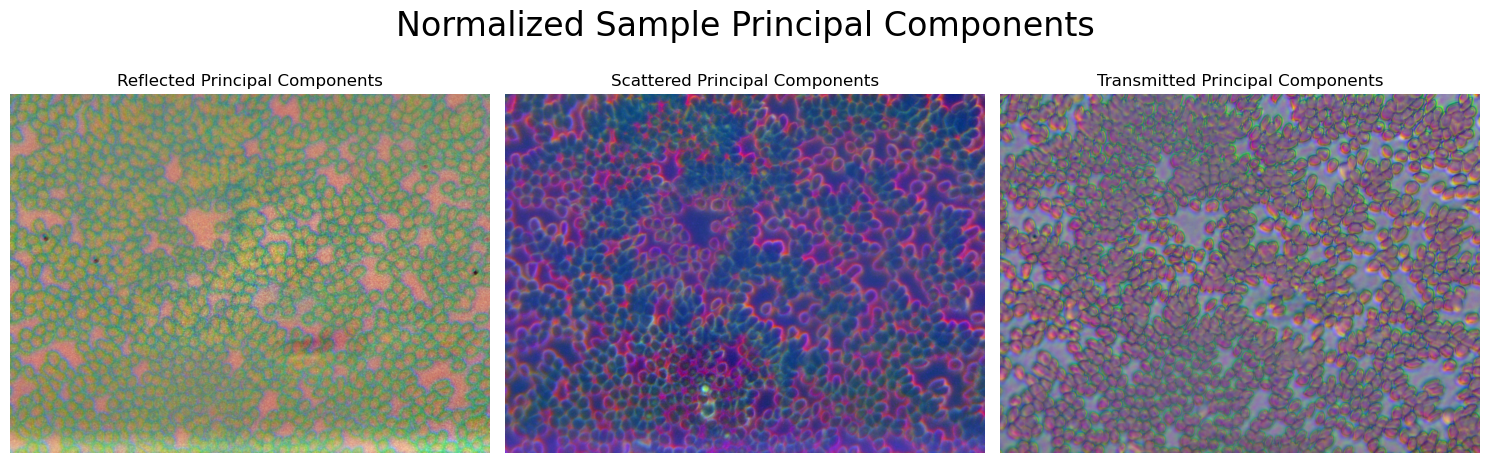

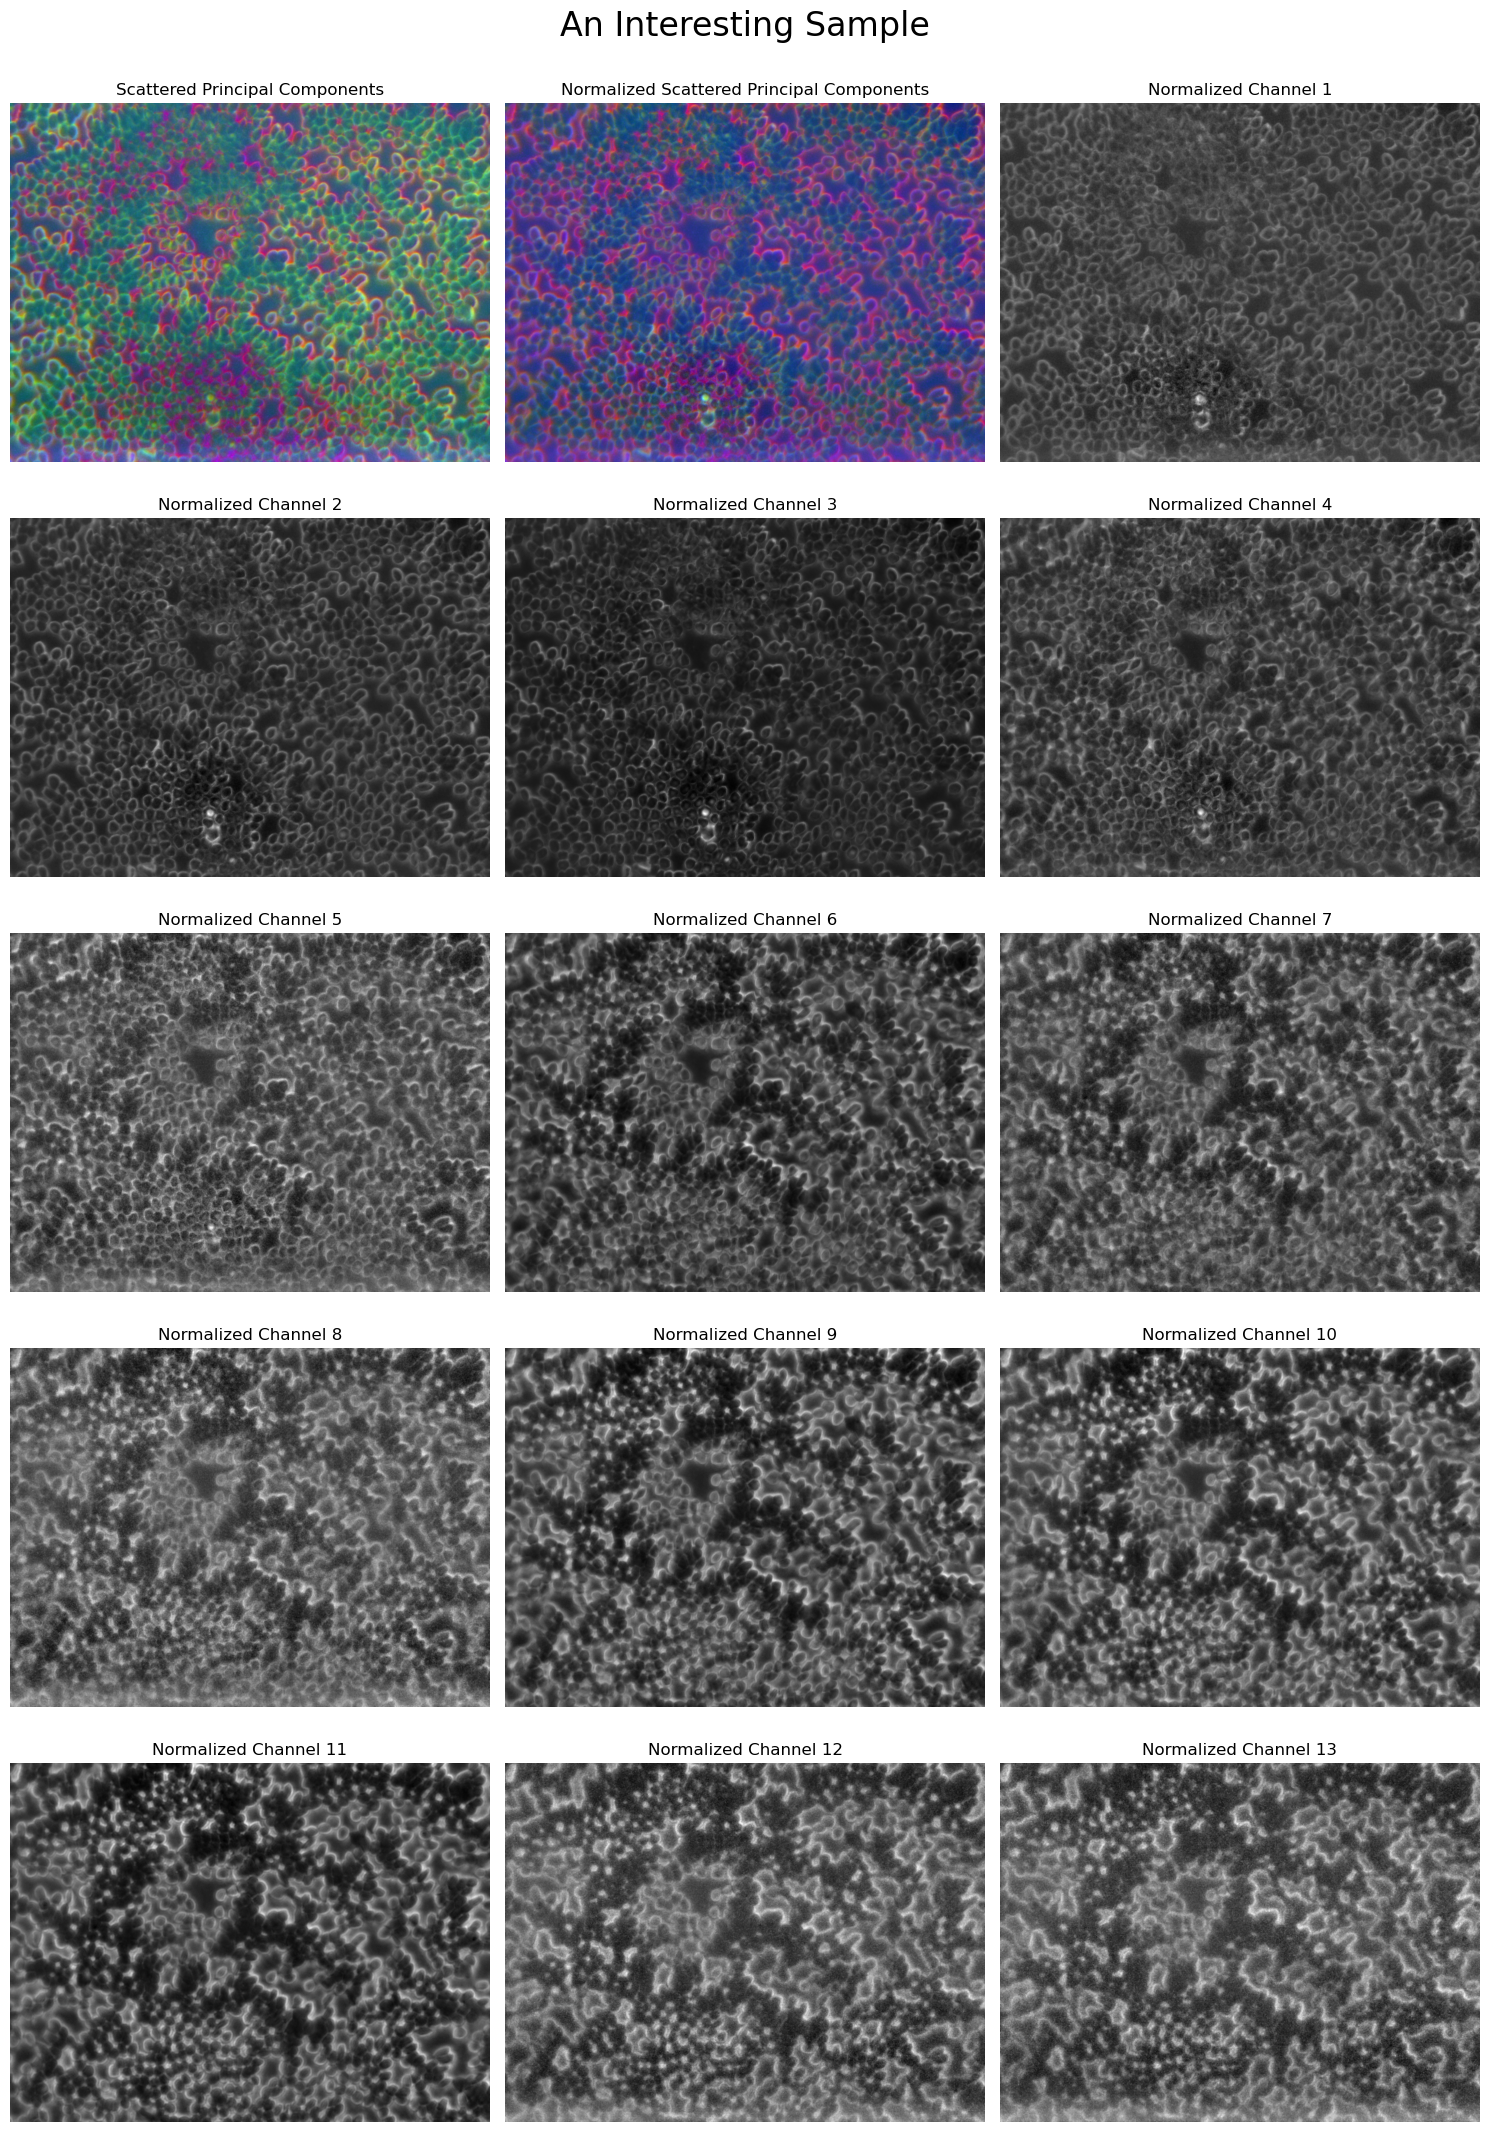

In [3]:
def plot_example(idx, dataset):
    # Get data
    print(idx)
    data = dataset[idx]
    sample = data["sample"]
    sample_norm = data["sample_norm"]
    name = data["name"]
    print(name)

    def get_principal_components(sample):
        """ Help function to compute and scale principal components. """
        pca = SamplePCA(n_components=3)
        pca.fit(sample)
        sample_principal = pca.transform(sample)[0]

        principal_image_R = sample_principal[0]
        principal_image_S = sample_principal[1]
        principal_image_T = sample_principal[2]

        # Rescale to range [0,1]
        min_R = np.min(principal_image_R, (1,2))
        max_R = np.max(principal_image_R, (1,2))
        principal_image_R = (principal_image_R - min_R[:, None, None]) / (max_R - min_R)[:, None, None]
        min_S = np.min(principal_image_S, (1,2))
        max_S = np.max(principal_image_S, (1,2))
        principal_image_S = (principal_image_S - min_S[:, None, None]) / (max_S - min_S)[:, None, None]
        min_T = np.min(principal_image_T, (1,2))
        max_T = np.max(principal_image_T, (1,2))
        principal_image_T = (principal_image_T - min_T[:, None, None]) / (max_T - min_T)[:, None, None]

        return principal_image_R, principal_image_S, principal_image_T

    # Plot results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    image_R = sample[0]
    image_S = sample[1]
    image_T = sample[2]
    axs[0].imshow(image_R.mean(axis=0), cmap='gray')
    axs[1].imshow(image_S.mean(axis=0), cmap='gray')
    axs[2].imshow(image_T.mean(axis=0), cmap='gray')
    axs[0].set_title("Reflected Average")
    axs[1].set_title("Scattered Average")
    axs[2].set_title("Transmitted Average")
    for ax in axs:
        ax.axis(False)
    plt.suptitle("Original Sample Average", fontsize=24)
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    principal_image_R, principal_image_S, principal_image_T = get_principal_components(sample)
    axs[0].imshow(principal_image_R.transpose(1, 2, 0))
    axs[1].imshow(principal_image_S.transpose(1, 2, 0))
    axs[2].imshow(principal_image_T.transpose(1, 2, 0))
    axs[0].set_title("Reflected Principal Components")
    axs[1].set_title("Scattered Principal Components")
    axs[2].set_title("Transmitted Principal Components")
    for ax in axs:
        ax.axis(False)
    plt.suptitle("Original Sample Principal Components", fontsize=24)
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    principal_image_R_norm, principal_image_S_norm, principal_image_T_norm = get_principal_components(sample_norm)
    axs[0].imshow(principal_image_R_norm.transpose(1, 2, 0))
    axs[1].imshow(principal_image_S_norm.transpose(1, 2, 0))
    axs[2].imshow(principal_image_T_norm.transpose(1, 2, 0))
    axs[0].set_title("Reflected Principal Components")
    axs[1].set_title("Scattered Principal Components")
    axs[2].set_title("Transmitted Principal Components")
    for ax in axs:
        ax.axis(False)
    plt.suptitle("Normalized Sample Principal Components", fontsize=24)
    plt.tight_layout()
    plt.show()
    
    fig, axs = plt.subplots(5, 3, figsize=(15, 22))
    axs = axs.flat
    image_S_norm = sample_norm[1]
    axs[0].imshow(principal_image_S.transpose(1, 2, 0))
    axs[1].imshow(principal_image_S_norm.transpose(1, 2, 0))
    for i in range(13):
        axs[i+2].imshow(image_S_norm[i], cmap='gray')
    axs[0].set_title("Scattered Principal Components")
    axs[1].set_title("Normalized Scattered Principal Components")
    for i in range(13):
        axs[i+2].set_title(f"Normalized Channel {i+1}")
    for ax in axs:
        ax.axis(False)
    plt.suptitle("An Interesting Sample", fontsize=24)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

idx = 62
plot_example(idx, dataset)